WEAK TURBULENCE (A More IDEAL case Transmission)

INITIALIZATION OF SOME CONSTANTS INVOLVED

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# System parameters
transmitter_power = 10  # in dBm
receiver_sensitivity = -30  # in dBm
wavelength = 1550e-9  # in meters (1550 nm)
link_distance = np.arange(500, 5001, 500) # in meters (500m to 5km in steps of 500m)
modulation_scheme = 'OOK'  # On-Off Keying

# Convert transmitter power from dBm to linear scale
transmitter_power_linear = 10**(transmitter_power / 10)

ATMOSPHERIC CHANNEL CONFIGURATIONS

In [16]:
def atmospheric_channel(sigma_R):
    """
    Simulate the atmospheric channel using log-normal distribution.
    
    :param link_distance: Distance of the FSO link in meters
    :param sigma_R: Rytov variance (measure of turbulence strength)
    :return: Channel gain
    """
    # Log-normal fading
    mean_log_amplitude = -0.5 * sigma_R**2
    std_log_amplitude = sigma_R
    
    log_amplitude = np.random.normal(mean_log_amplitude, std_log_amplitude)
    channel_gain = np.exp(log_amplitude)
    
    return channel_gain



SIGNAL TRANSMISSION AND RECEPTION

In [14]:
def simulate_fso_link(transmitter_power_linear, channel_gain, receiver_sensitivity_linear):
    """
    Simulate the FSO link.
    
    :param transmitter_power_linear: Transmitter power in linear scale
    :param channel_gain: Channel gain from the atmospheric channel
    :param receiver_sensitivity_linear: Receiver sensitivity in linear scale
    :return: Received power
    """
    received_power = transmitter_power_linear * channel_gain
    return received_power



THEORETICAL PERFORMANCE TEST

In [9]:
if received_power >= receiver_sensitivity_linear:
    print("Link successful. Received power: {:.2e} W".format(received_power))
else:
    print("Link failed. Received power: {:.2e} W".format(received_power))


Link successful. Received power: 1.05e+01 W


Running the program

In [17]:
# Convert receiver sensitivity from dBm to linear scale
receiver_sensitivity_linear = 10**(receiver_sensitivity / 10)

# Rytov variance for weak turbulence
sigma_R = 0.1  # Adjust based on the turbulence strength

# Number of simulations
num_simulations = 1000

# Storage for results
received_powers = []
success_rates = []

for distance in link_distance:
    distance_received_powers = []
    success_count = 0
    for _ in range(num_simulations):
        channel_gain = atmospheric_channel(sigma_R)
        received_power = simulate_fso_link(transmitter_power_linear, channel_gain, receiver_sensitivity_linear)
        distance_received_powers.append(received_power)
        if received_power >= receiver_sensitivity_linear:
            success_count += 1
    received_powers.append(distance_received_powers)
    success_rate = success_count / num_simulations
    success_rates.append(success_rate)

Recieved Power Distribution Plot

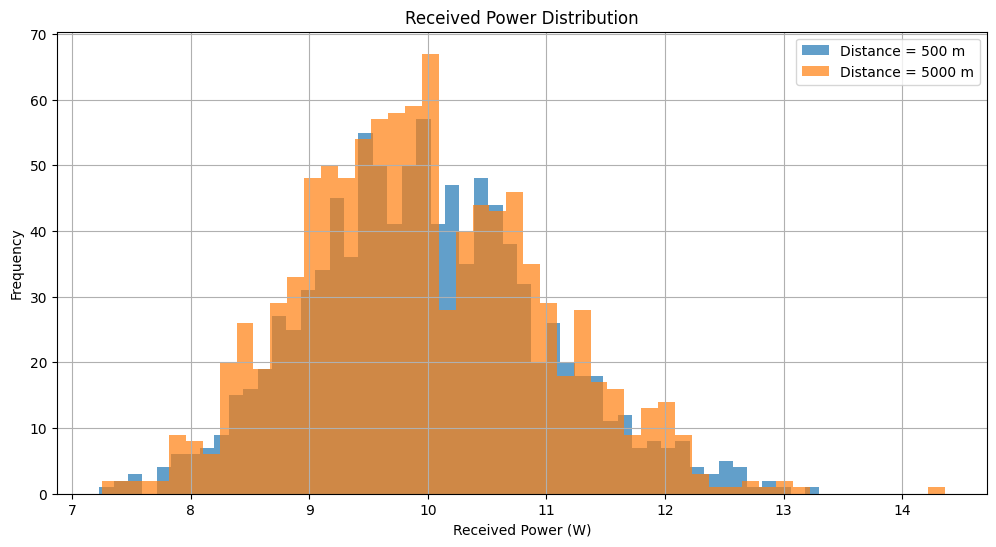

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(received_powers[0], bins=50, alpha=0.7, label=f'Distance = {link_distance[0]} m')
plt.hist(received_powers[-1], bins=50, alpha=0.7, label=f'Distance = {link_distance[-1]} m')
plt.xlabel('Received Power (W)')
plt.ylabel('Frequency')
plt.title('Received Power Distribution')
plt.legend()
plt.grid(True)
plt.show()

Plot Link Success Rate vs. Distance

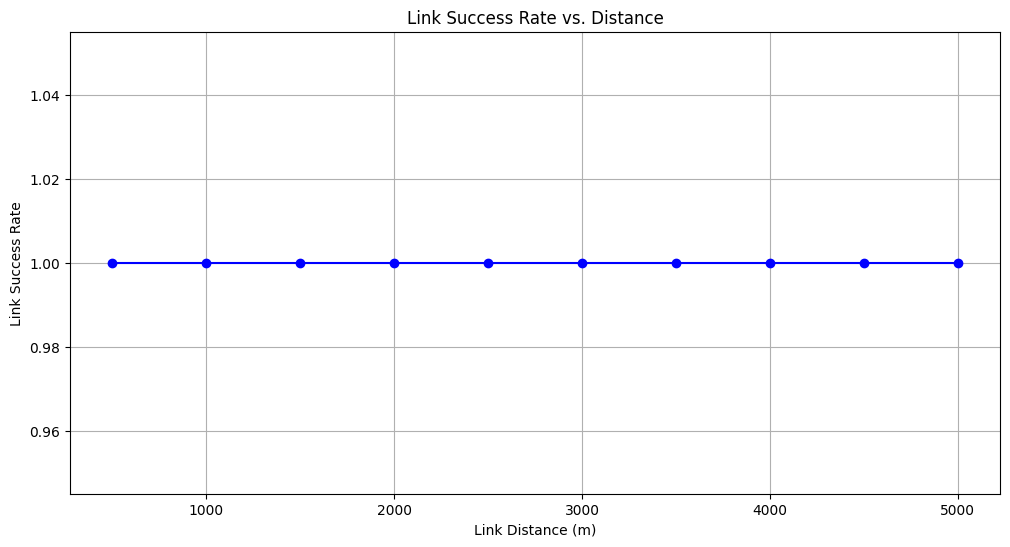

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(link_distance, success_rates, marker='o', linestyle='-', color='b')
plt.xlabel('Link Distance (m)')
plt.ylabel('Link Success Rate')
plt.title('Link Success Rate vs. Distance')
plt.grid(True)
plt.show()